In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
import random
import pandas as pd
import shutil
import os

In [3]:
dataDir='/Users/isaacchristian/Desktop/Princeton/RESEARCH/CANS/'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)



In [11]:
master_file = 'study_data/val2017_n600.csv'

# used 800/1584 from the below file for subjects 14-17# 
#master_file = 'train2017_1584of4866sample_3-19-23-PART4.csv'
# used this file for final three subjects 
#master_file = 'val2017_n600.csv'

img_loc = '/Users/isaacchristian/Desktop/Princeton/RESEARCH/CANS/study_data/train2017_coco_4866/'
directory_prefix = 'final_stim_list'
sav_dir = '/Users/isaacchristian/Desktop/Princeton/RESEARCH/CANS/study_data/' + directory_prefix

dat = pd.read_csv(dataDir+master_file)

In [25]:
np.asarray(dat['imageLocation'])

array(['000000000872.jpg', '000000001268.jpg', '000000001490.jpg',
       '000000002261.jpg', '000000002685.jpg', '000000003255.jpg',
       '000000003934.jpg', '000000004765.jpg', '000000005001.jpg',
       '000000005001.jpg', '000000005037.jpg', '000000007278.jpg',
       '000000007511.jpg', '000000007816.jpg', '000000008211.jpg',
       '000000008211.jpg', '000000008690.jpg', '000000008690.jpg',
       '000000008844.jpg', '000000009378.jpg', '000000009400.jpg',
       '000000010707.jpg', '000000010764.jpg', '000000011511.jpg',
       '000000013348.jpg', '000000014473.jpg', '000000017207.jpg',
       '000000017627.jpg', '000000017627.jpg', '000000017959.jpg',
       '000000018837.jpg', '000000019402.jpg', '000000019786.jpg',
       '000000021604.jpg', '000000021839.jpg', '000000021879.jpg',
       '000000025057.jpg', '000000025394.jpg', '000000028993.jpg',
       '000000029984.jpg', '000000030504.jpg', '000000031093.jpg',
       '000000031118.jpg', '000000031322.jpg', '000000031817.j

In [4]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.41s)
creating index...
index created!


In [5]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
sports appliance indoor food kitchen person accessory electronic outdoor vehicle furniture animal


# Begin 

In [6]:
## SET SEED ### 

In [12]:
random.seed(10)

In [13]:
# get all images containing given categories, select one at random
# which category?
catIds = coco.getCatIds(catNms=['person']);
# Get all picture Ids from that category
imgIds = coco.getImgIds(catIds=catIds );


In [18]:
# Length of images in category (people) for validation dataset 
len(imgIds)

2693

In [16]:
# Get image IDs # 
# num ids to randomly select
num_img = 1400

In [17]:
# Randomly Select some images from our category # 
rand_imgs = np.random.randint(0,len(imgIds),num_img)

In [20]:
# convert all category Ids to numpy for indexing 
img_ids_arr = np.asarray(imgIds)

In [22]:
# Get image indexes for all randomly selected images 
selected_imgs = img_ids_arr[rand_imgs]

In [31]:
new_imgs = [i for i in selected_imgs if i in np.asarray(dat['imageLocation'])]

In [32]:
len(new_imgs)

0

In [35]:
# load all images using their indexes # 
all_img = coco.loadImgs(selected_imgs)
# load one image # 
target = 3
img = all_img[target]

In [217]:
new_imgs = [i for i in all_img if i['file_name'] not in np.asarray(dat['imageLocation'])]

In [219]:
len(new_imgs)

1116

In [395]:
img = new_imgs[71]

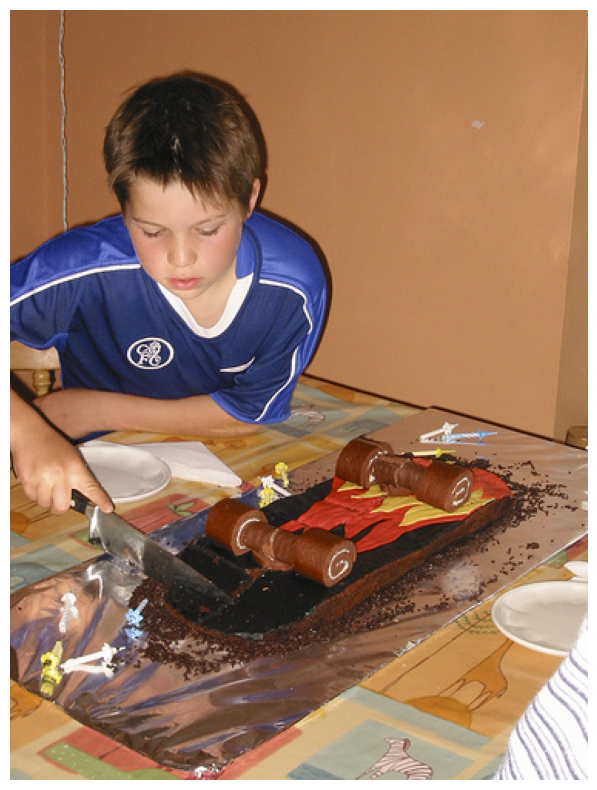

In [396]:
# load and display image
I = io.imread('%s/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
#I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()


In [397]:
img['file_name']

'000000025096.jpg'

In [234]:
for i in range(70):
    print(new_imgs[i]['file_name']) 

000000489764.jpg
000000140583.jpg
000000297022.jpg
000000427338.jpg
000000393469.jpg
000000345385.jpg
000000021167.jpg
000000434247.jpg
000000372819.jpg
000000132544.jpg
000000319534.jpg
000000515445.jpg
000000323496.jpg
000000235241.jpg
000000185890.jpg
000000478721.jpg
000000102820.jpg
000000364884.jpg
000000182805.jpg
000000394677.jpg
000000558421.jpg
000000176901.jpg
000000570756.jpg
000000020571.jpg
000000121591.jpg
000000013774.jpg
000000427077.jpg
000000463918.jpg
000000022705.jpg
000000066886.jpg
000000054164.jpg
000000559160.jpg
000000111609.jpg
000000343453.jpg
000000513524.jpg
000000272148.jpg
000000163682.jpg
000000554002.jpg
000000184324.jpg
000000344029.jpg
000000576052.jpg
000000484351.jpg
000000371529.jpg
000000296649.jpg
000000199771.jpg
000000192670.jpg
000000109992.jpg
000000232649.jpg
000000037670.jpg
000000321790.jpg
000000000885.jpg
000000384468.jpg
000000302107.jpg
000000394940.jpg
000000570471.jpg
000000291634.jpg
000000476415.jpg
000000059635.jpg
000000343218.j

In [54]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


A bunch of remotes that are in cloth holders.
four different controllers in a couches controller case and a person
The four remotes are inside of pockets on the arm of a couch.
A remote control storage pouch attached to a couch. 
a remote control holder attached to living room furniture that is full of controllers


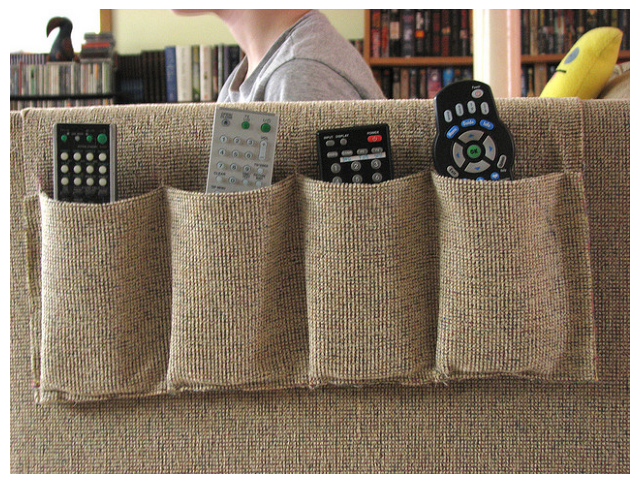

In [55]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()

In [400]:
dataDir

'/Users/isaacchristian/Desktop/Princeton/RESEARCH/CANS/'

# Create Datasets 

In [402]:
my_study_dat = dataDir + '/study_data/val2017_samp750/'
test_csv =  pd.read_csv(dataDir+'/study_data/val2017_n600.csv')

In [407]:
test_csv['imageLocation'][0]

'000000000872.jpg'

In [408]:
img_inc = []
for i in range(len(test_csv['imageLocation'])):
    src = dataDir+dataType+ "/"+ test_csv['imageLocation'][i]
    img_inc.append(test_csv['imageLocation'][i])
    shutil.copy(src, my_study_dat)


In [63]:
df = pd.DataFrame(img_inc, columns=['imageLocation'])
df.to_csv(my_study_dat+"val2017_n750.csv", index=False)

In [64]:
df

,imageLocation
0,000000327617.jpg
1,000000350405.jpg
2,000000218439.jpg
3,000000400161.jpg
4,000000240250.jpg
...,...
795,000000293200.jpg
796,000000427160.jpg
797,000000334555.jpg
798,000000511076.jpg


In [ ]:
#### What about categor!!!! ******** ### 
"""
need to do roughly the same amount of category? or should i just pull from all?
naa do an equal proportion -- so find all categories that contain person, and balance
print an excel file with the pic num and the ID num
decision to include == yes or no?
"""

In [ ]:
# make excel file # 

In [97]:
my_id = []
my_jpg = []
for i in range(len(intersect)):
    my_id.append(intersect[i]['file_name'])
    my_jpg.append(intersect[i]['id'])
    
cols = np.column_stack((my_jpg,my_id, ))

In [98]:
dat = pd.DataFrame(cols,columns =['ID', "file_name"])

In [99]:
dat.to_csv(dataDir+"1629_train_capgaze_person_2-20-23.csv")

# Find capgaze with persons

In [22]:
# seedy #
random.seed(10)

In [42]:
dataDir='/Users/isaacchristian/Desktop/Princeton/RESEARCH/CAPA/'
dataType='train2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
capgaze = "cap_gaze2-corpus2/3000_images/"

In [34]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=13.03s)
creating index...
index created!


In [35]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
person animal indoor furniture sports vehicle appliance outdoor food electronic kitchen accessory


In [36]:
# get all images containing given categories, select one at random
# which category?
catIds = coco.getCatIds(catNms=['person']);
# Get all picture Ids from that category
imgIds = coco.getImgIds(catIds=catIds );


# Begin

In [37]:
# load all images using their indexes # 
all_img = coco.loadImgs(imgIds)

In [38]:
# length #
len(all_img)

64115

In [77]:
all_img[0]

{'license': 2,
 'file_name': '000000262145.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000262145.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-20 02:07:55',
 'flickr_url': 'http://farm8.staticflickr.com/7187/6967031859_5f08387bde_z.jpg',
 'id': 262145}

In [44]:
directory

'/Users/isaacchristian/Desktop/Princeton/RESEARCH/CAPA/cap_gaze2-corpus2/3000_images/'

# Load capgaze 2 

In [73]:
directory = dataDir + capgaze 
cap_gaze_imgs = []
cap_gaze_num = []
 
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        cap_gaze_imgs.append(f)
        cap_gaze_num.append(f[-16:])

In [74]:
cap_gaze_imgs[0]

'/Users/isaacchristian/Desktop/Princeton/RESEARCH/CAPA/cap_gaze2-corpus2/3000_images/COCO_train2014_000000492293.jpg'

In [76]:
len(cap_gaze_num)

3000

In [79]:
cap_gaze_num[:5]

['000000492293.jpg',
 '000000182505.jpg',
 '000000491942.jpg',
 '000000567018.jpg',
 '000000190667.jpg']

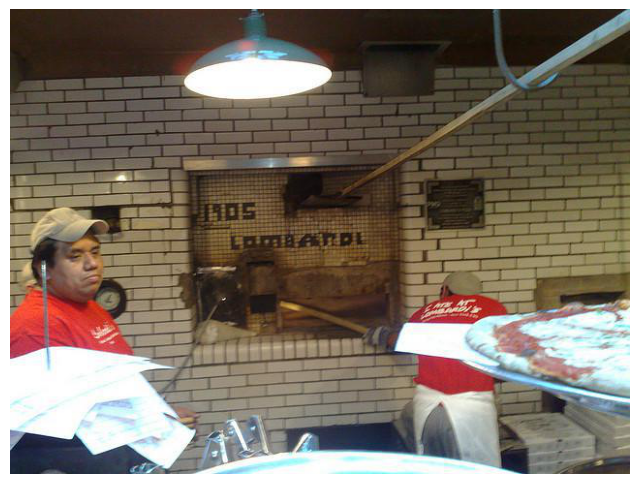

In [50]:
# load and display image
I = io.imread(cap_gaze_imgs[1])
# use url to load image
#I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [18]:
all_img

[{'license': 3,
  'file_name': '000000532481.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000532481.jpg',
  'height': 426,
  'width': 640,
  'date_captured': '2013-11-20 16:28:24',
  'flickr_url': 'http://farm7.staticflickr.com/6048/5915494136_da3cfa7c5a_z.jpg',
  'id': 532481},
 {'license': 1,
  'file_name': '000000458755.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000458755.jpg',
  'height': 480,
  'width': 640,
  'date_captured': '2013-11-16 23:06:51',
  'flickr_url': 'http://farm6.staticflickr.com/5119/5878453277_eea657a01d_z.jpg',
  'id': 458755},
 {'license': 1,
  'file_name': '000000385029.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000385029.jpg',
  'height': 480,
  'width': 640,
  'date_captured': '2013-11-21 05:40:19',
  'flickr_url': 'http://farm5.staticflickr.com/4061/4670536748_8c7bd89494_z.jpg',
  'id': 385029},
 {'license': 4,
  'file_name': '000000311303.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/00000

In [ ]:
# Find images in capgaze with people

In [84]:
intersect = []
trak_count = 0
for img_num in range(len(all_img)):
    if all_img[img_num]['file_name'] in cap_gaze_num:
        intersect.append(all_img[img_num])
        trak_count+=1
        

In [85]:
trak_count

1629

In [87]:
intersect[0]['file_name'] 

'000000000109.jpg'

# Load Datasets

In [121]:
dataDir='/Users/isaacchristian/Desktop/Princeton/RESEARCH/CANS/study_data/1629_train_capgaze/'
file = 'final_HH_PART1_n608of1629_train_capgaze_person_2-28-23.csv'
img_loc = '/Users/isaacchristian/Desktop/Princeton/RESEARCH/CANS/study_data/1629_train_capgaze/train_capgaze/'
sav_dir = '/Users/isaacchristian/Desktop/Princeton/RESEARCH/CANS/study_data/final_stim_list/'

In [119]:
dat = pd.read_csv(dataDir+file)

In [120]:
dat

,ID,file_name,Obvious,Looking at camera?,notes
0,109,000000000109.jpg,1,no,NaN
1,1523,000000001523.jpg,1,no,difficult to see the driver behind the window ...
2,3000,000000003000.jpg,2,no,NaN
3,3276,000000003276.jpg,1,no,OC
4,3521,000000003521.jpg,2,no,NaN
...,...,...,...,...,...
603,259088,000000259088.jpg,3,no,NaN
604,260973,000000260973.jpg,3,no,NaN
605,262477,000000262477.jpg,3,no,hard to see people
606,269871,000000269871.jpg,3,no,a lot is happening


In [27]:
one_n_two = dat[(dat['Obvious']==1.0) | (dat['Obvious']==2.0)]
one_n_two

,ID,file_name,Obvious,Looking at camera?,notes,Unnamed: 5,I left the note OC whenever the person's attention is obviously directed at an unknown subject off-camera
0,109,000000000109.jpg,1.0,no,NaN,NaN,NaN
1,1523,000000001523.jpg,1.0,no,difficult to see the driver behind the window ...,NaN,NaN
2,2281,000000002281.jpg,2.0,yes?,the woman is sort of simultaneously attending ...,NaN,NaN
5,3000,000000003000.jpg,2.0,no,NaN,NaN,NaN
6,3276,000000003276.jpg,1.0,no,OC,NaN,NaN
...,...,...,...,...,...,...,...
793,286645,000000286645.jpg,1.0,no,ski,NaN,NaN
794,286888,000000286888.jpg,2.0,no,many subjects; easy to identify once you choos...,NaN,NaN
795,287024,000000287024.jpg,1.0,no,tennis,NaN,NaN
796,287136,000000287136.jpg,1.0,no,NaN,NaN,NaN


In [26]:
len(one_n_two[(one_n_two['notes']=='OC') ])

58

# Visualize

In [13]:
file = '000000320803.jpg'

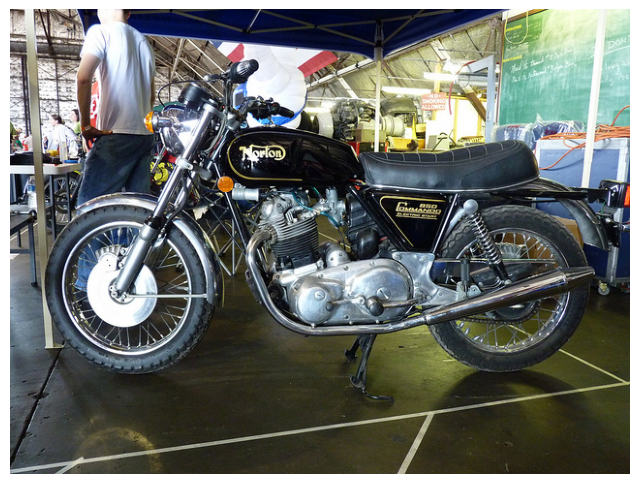

In [14]:
# load and display image
I = io.imread(img_loc + file)
# use url to load image
#I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

# Create stim list

In [1]:
%matplotlib inline
#from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
import random
import pandas as pd
import shutil
import os

In [6]:
dataDir='/Users/isaacchristian/Desktop/Princeton/RESEARCH/CANS/study_data/1629_train_capgaze/'
master_file = 'capgaze_master_n1238of1629.csv'
img_loc = '/Users/isaacchristian/Desktop/Princeton/RESEARCH/CANS/study_data/1629_train_capgaze/train_capgaze/'
directory_prefix = 'final_stim_list'
sav_dir = '/Users/isaacchristian/Desktop/Princeton/RESEARCH/CANS/study_data/' + directory_prefix


In [4]:
"""
Documentation:
- 6 subjects ranging from 30-1220 using 'capgaze_master_n1238of1629.csv'
-sub-004 only completed 3 runs, so 120 images from 'capgaze_master_n1238of1629.csv'
"""

start_img = 30
end_img = 1230
img_per_sub = 200

In [5]:
# check loop # 
for beg_img in range(int(start_img / img_per_sub),int(end_img / img_per_sub)):
    print(f'sub is {beg_img+1}')

sub is 1
sub is 2
sub is 3
sub is 4
sub is 5
sub is 6


In [7]:
dat = pd.read_csv(dataDir+master_file)

In [8]:
dat

,ID,file_name
0,109,000000000109.jpg
1,1523,000000001523.jpg
2,3000,000000003000.jpg
3,3276,000000003276.jpg
4,3521,000000003521.jpg
...,...,...
1233,579419,000000579419.jpg
1234,579899,000000579899.jpg
1235,580082,000000580082.jpg
1236,580507,000000580507.jpg


In [9]:
for beg_img in range(int(start_img / img_per_sub),int(end_img / img_per_sub)):
    first_img = beg_img*img_per_sub + start_img
    end_img = first_img+img_per_sub
    df = pd.DataFrame({"imageLocation": 'train_capgaze/' + dat.iloc[first_img:end_img,1]})
    assert len(df) == img_per_sub
    df.to_csv(sav_dir+"/sub-" + str(beg_img+1).zfill(3)+'_stimuli.csv', header=True, index=False)
    
    print("subject", beg_img+1)
    print(f'beginning is {first_img}')
    print(f'end is {end_img}')
    

subject 1
beginning is 30
end is 230
subject 2
beginning is 230
end is 430
subject 3
beginning is 430
end is 630
subject 4
beginning is 630
end is 830
subject 5
beginning is 830
end is 1030
subject 6
beginning is 1030
end is 1230


In [ ]:
"""
Documentation:
- sub-000 is 50 images (my captioning)
- sub-001 to sub-002: 50-450

"""

In [46]:
beg_img

1

In [48]:
np.arange(start_img, end_img, img_per_sub)

array([ 50, 250])

In [ ]:
np.arange(start_img, end_img, img_per_sub)